<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/NaiveBayesAndDecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 6: Naive Bayes Algorithm & Decision Trees

## Learning Objectives

At the end of the experiment, you will be able to

* understand the Bayes theorem.
* use the Bayes theorem in the Naive Bayes algorithm for classification.
* use different metrics for the Naive bayes algorithm
* understand the basics of Decision trees.
* use multiple metrics which are popular with the decision tree algorithm.

### Import important libraries required for this assignments

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M2_Assignment_06_NaiveBayesAndDecisionTrees_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip -qq install dtreeviz ")
    
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")


Please complete Id and Password cells before running setup


In [5]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 764 kB/s 


In [6]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap                                    # to import color map                                          
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor          # to import DT classifier and Regressor
import graphviz                                                                 # to import graphviz 
from dtreeviz.trees import dtreeviz                                             # to import dtreeviz 
%matplotlib inline

from sklearn.naive_bayes import GaussianNB


### Bayes Theorem




**Why we need Bayesian inference?**

In general, statistical inference is the process of determining properties of a model/distribution, given some data. Bayesian inference can be seen as the Bayesian counterpart to frequentist inference. In Frequentist inference, there is usually the notion of some true, unknown, parameter which is a constant, and point estimates are inferred from data. Contrarily, Bayesian inference treats the model parameters as random variables and usually wants to deduce probabilistic statements about the distribution of parameters.

**Terminology**

The basic terms related to Bayesian inference are as follows:

- **Prior:** the probability distribution that would express one's beliefs about an uncertain quantity before some evidence is taken into account.
- **Posterior:**  in Bayesian statistics, it is the revised or updated probability of an event occurring after taking into consideration new information.

### Naive Bayes Classifiers

Naive Bayes classifiers are built on Bayes rule.
We are try to use bayes theorem to classify data (can be images, text, speech or any other form of data). We're interested in finding the probability of a label given the observations made, which we can write as $P(L~|~{D})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm D}) = \frac{P({\rm D}~|~L)P(L)}{P({\rm D})}
$$

If we have two classes (two labels), let them be denoted by $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm D})}{P(L_2~|~{\rm D})} = \frac{P({\rm D}~|~L_1)}{P({\rm D}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm D}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through a "Naive" assumption that each label is associated with a speicfic distribution (often a gaussian).

Let us now check on how to use a Naive bayes classifier. We first load the IRIS dataset.Please note that the same dataset will also be used to train a decision tree in the next part of this assignment.

In [7]:
# Preparing the data into X (predictor) and Y (target).
iris = datasets.load_iris()

# Considering two features, the sepal length and width.
# X is the input
X = iris.data[:, 2:]

# y is the target
y = iris.target

# Creating train and test splits in the data
# Train split will be used to train the model
train_split_X, train_split_y = X[0:140], y[0:140]

# The test split will be used to check the accuracy on the test set.
test_split_X, test_split_y = X[140:], y[140:]


In [8]:
# Defining the naive bayes model. In this we assume the distribution associated with a label is a gaussian one.
model = GaussianNB()

# Training the model on the train split
model.fit(train_split_X, train_split_y);

In [9]:
# Calculating the accuracy of the model
acc = model.score(test_split_X, test_split_y)
print ("Accuracy of a pure Naive Bayes Classifier: ", acc*100, "%")

Accuracy of a pure Naive Bayes Classifier:  100.0 %


## When to Use Naive Bayes

Naive Bayesian classifiers uses stringent assumptions about data hence they may not perform that well as a more complicated model.
the main advantages they offer are:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then it will be preferred over others due to its advantages, else look for better models!

Let us now look at another type of classifiers calles the Decision Trees.

### Decision Trees

Decision Trees are supervised Machine Learning algorithms that can perform both classification and regression tasks and even multioutput tasks. They can handle complex datasets. As the name shows, it uses a tree-like model to make decisions in order to classify or predict according to the problem. It is an ML algorithm that progressively divides datasets into smaller data groups based on a descriptive feature until it reaches sets that are small enough to be described by some label.

The importance of decision tree algorithm is that it has many applications in the real world. This is because of its interpretability. Note that while deep learning algorithms can be highly accurate, they are also highly interpretable. This allows applications like:

1. In the Healthcare sector: To develop Clinical Decision Analysis tools which allow decision-makers to apply for evidence-based medicine and make objective clinical decisions when faced with complex situations.
2. Virtual Assistants (Chatbots): To develop chatbots that provide information and assistance to customers in any required domain.
3. Retail and Marketing: Sentiment analysis detects the pulse of customer feedback and emotions and allows organizations to learn about customer choices and drives decisions.





#### How can an algorithm be represented as a tree?

![Image](https://i.ibb.co/rwBRM7B/decistion-tree.jpg)

$\hspace{8cm} \text {Figure 1: Basic Structure of Decision Tree}$

For this, let us see the basic example of the [titanic dataset](https://data.world/nrippner/titanic-disaster-dataset) which predicts whether a passenger survives or not. The below tree uses 3 attributes from the dataset, namely sex, age, and sibsp (Number of Siblings/Spouses Aboard).

![Image](https://miro.medium.com/max/360/1*XMId5sJqPtm8-RIwVVz2tg.png)

$\hspace{8cm} \text {Figure 2: Decision tree using example}$

A decision tree is drawn upside down with its root at the top. In the image on the left (is age $>$ 9.5), the bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived, represented as red and green text respectively.

To know more about, decision trees, click [here](https://blog.paperspace.com/decision-trees/).



### Training and Visualizing a Decision Tree

The decision trees can be divided, with respect to the target values, into:

- Classification trees: used to classify samples, assign to a limited set of values - classes. In Scikit-Learn it is `DecisionTreeClassifier`.
- Regression trees: used to assign samples into numerical values within the range. In Scikit-Learn it is `DecisionTreeRegressor`.

To understand Decision Trees, let’s just build one and take a look at how it makes predictions. The  following  code  trains  a  DecisionTreeClassifier  on  the  iris  dataset:

In [10]:
# Fit the DT classifier with max_depth = 2
clf = DecisionTreeClassifier(max_depth = 2, random_state=1234)
model = clf.fit(train_split_X, train_split_y)

In [11]:
# Calculating the accuracy of the decision tree
acc = model.score(test_split_X, test_split_y)
print ("Accuracy of a pure DT Classifier: ", acc*100, "%")

Accuracy of a pure DT Classifier:  100.0 %


#### Text Representation

Visualizing the Decision tree in text using `text.export_text`. This is important when we want to obtain the model information in a text file.

In [12]:
text_representation = tree.export_text(clf)
# Display result
print(text_representation)

|--- feature_0 <= 2.45
|   |--- class: 0
|--- feature_0 >  2.45
|   |--- feature_1 <= 1.75
|   |   |--- class: 1
|   |--- feature_1 >  1.75
|   |   |--- class: 2



If you want to save it to the file, it can be done with the following code:

In [13]:
# Save in figure
with open("decision_tree.log", "w") as f_out:
    f_out.write(text_representation)

#### Visualize Tree with `plot_tree`

This feature requires matplotlib library to be installed. It allows us to easily visualize the tree into a figure (without intermediate exporting to graphviz). You can also refer the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to learn more about `plot_tree`.

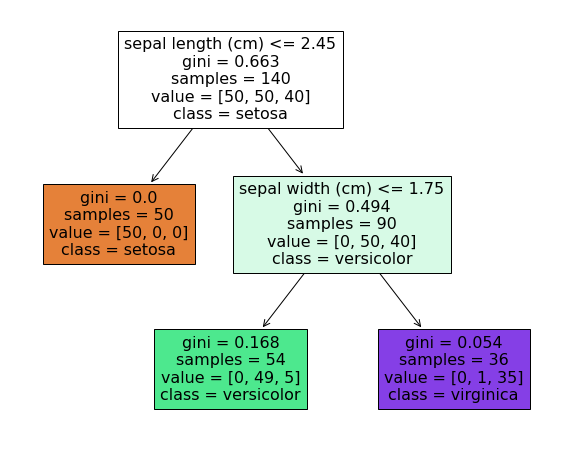

In [14]:
# Visualize tree
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)                           # filled = True uses color coding for majority of classes

In [15]:
# Save the figure to the .png file
fig.savefig("decision_tree.png")

#### How Decision Tree Makes Prediction

In the above example, we see how the Decision tree makes predictions. In this, we need to classify a flower. At depth 0, at the top (root node), this node asks the condition whether the flower’s sepal length $\leq$ 2.45 cm. If it is, then we move down to the root’s left child node (depth 1, left). Here, it's a leaf node (means it does not have any child nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the  Decision Tree predicts that the flower is an Iris-Setosa (class=setosa).

Now, in another case, when the sepal length of a flower is $\geq$ 2.45cm. We then move down to right the child node (depth 1, right), which is not a leaf node, and ask if sepal width is $\leq$ 1.75cm. If it is, then the flower is Iris-Versicolor (depth 2, left). If not, it is surely, Iris-Virginica (depth 2, right).

On each node, the `samples` represent the number of training instances. For example, 54 samples have sepal length $\geq$ 2.45cm and sepal width $\leq$ 1.75cm (depth 2, left). The node's `values` show how many training instances of each class this node applies. For example, at depth 2, right, applies 0 to Iris-Setosa, 1 to Iris-Versicolor, and 45 to Iris-Virginica.

At last, the `gini-impurity` measures the node's impurity, if a node is `pure` (gini = 0), means that all the instances belong to a single class. Example, depth 1, left node. 

##### Gini Impurity and Entropy

In a decision tree, by default `gini_impurity` is used. But, we can use `entropy` by changing the `criterion` hyperparameter to "`entropy`". The gini impurity is one of the methods used in decision tree algorithms to decide the optimal split from a root node and subsequent splits. 

The entropy came from thermodynamics, where if entropy approaches 0 that means the molecules are still and well-ordered. In ML, it is used to measure the impurity: a set's entropy 0 means that all the instances belong to the same class.

*Equation for calculating the Gini-impurity:*

$G_i =$ $1 - \sum_{k=1}^{n} p_{i,k}^2$ 

The above equation shows how the training algorithm computes the gini-score $G_i$ of the $i^{th}$ node. 

For example, the *depth-2 left node* has a gini score equal  to $1 – (0/54)^2 – (49/54)^2 – (5/54)^2 ≈ 0.168$.

*Equation for calculating the Entropy:*

$H_i =$ $- \sum_{i=1}^{n} p_{i,k} \log_2 (p_{i,k})$, $\hspace{0.5cm}where, p_{i,k} \neq 0$

The above equation shows the definition  of  the  entropy  of  the  $i^{th}$  node.

For  example, given above, the *depth-2 left node* has an entropy equal to $- \frac{49}{54} \log_2 (\frac{49}{54}) - \frac{5}{54} \log_2 (\frac{5}{54}) \approx 0.445$

Where, $k$ is class of the problem. In this example, there are three classes, Iris-versicolor, Iris-Setosa, and Iris-Virginica.

#### Estimating Class Probabilities

The instance probability denoted by $p_{i,k}$ denotes the probability of an instance belongs to a class $k$. 

For example, we have a flower whose sepal length is 5cm and sepal width is 1.5cm (depth 2, left node). The following probabilities: 0% for Iris-Setosa $(\frac{0}{54})$, 90.74% for Iris-Versicolor $(\frac{49}{54})$, and 9.25% for Iris-Verginica $(\frac{5}{54})$. And this will predict the class as Iris-Versicolor. 

In [16]:
# Predicting probability of a class
clf.predict_proba([[5, 1.5]])          

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
# Predicting a class
clf.predict([[5, 1.5]])

array([1])

### The CART Training Algorithm

Scikit-Learn  uses  the  Classification  And  Regression  Tree  (CART)  algorithm  to  train Decision Trees (also called “growing” trees). CART constructs binary trees using the feature and threshold that yield the largest information gain or minimum gini-impurity at each node.

*Cart Cost Function For Classification*

$J_{k,t_k} =$ $\frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$

\begin{equation*}
Where\begin{cases}
         G_{left/right} \hspace{0.25cm} \text{measures the  impurity  of  the  left/right  subset}, \\
         m_{left/right} \hspace{0.25cm} \text{is  the  number  of  instances  in  the  left/right  subset}  \\
     \end{cases}
\end{equation*}

Equation shows that the algorithm first the splits the training subsets using a single feature $k$ and a limiting value or condition $t_k$. The algorithm works as follows:

- It creates different pairs of $(k,t_k)$. It searches for the pair that produces the purest subset (i.e.minimum gini-impurity) weighted by their size.

Once it splits the training set in  two, it splits the subsets using the same algorithm and this iteration will be done until it reaches the maximum depth (i.e., `max_depth` hyperparameter). A  few  other  hyperparameters control   additional  stopping   conditions (`min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes`).



### Regularization Hyperparameters

Decision tree does not make any prior assumptions of training data (unlike linear models, which assume the data as linear).  If left unconstrained, the tree will closely fit itself according to the training instances, and most likely lead to overfitting (means the model will perform poorly on the test dataset). So, to avoid overfitting the training data, the hyperparameters need to be restricted and passed during the modeling. This process is what is known as Regularization Hyperparameters. 

In  Scikit-Learn,  this  is  controlled  by  the `max_depth`  hyperparameter  (the  `default  value`  is  `None`,  which  means  unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting. The `DecisionTreeClassifier` class has a few other parameters that similarly restrict the  shape  of  the  Decision  Tree:  `min_samples_split` (the  minimum  number  of  samples a node must have before it can be split), `min_samples_leaf` (the minimum number   of   samples   a   leaf   node   must   have),   `min_weight_fraction_leaf`   (same   as min_samples_leaf  but  expressed  as  a  fraction  of  the  total  number  of  weighted instances), `max_leaf_nodes` (maximum  number  of  leaf  nodes),  and  `max_features` (maximum number of features that are evaluated for splitting at each node). Increasing  `min_*`  hyperparameters  or  reducing  `max_*`  hyperparameters  will  regularize  the model.

In the example below, we will visualize the decision tree, one by regularizing hyperparameter and one without any restrictions.  

In [18]:
# Load iris dataset and define variables with sepal length and width
iris = datasets.load_iris()
X = iris.data[:, 2:] 
y = iris.target

# First tree without restrictions
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Second tree with hyperparameters
tree_clf2 = DecisionTreeClassifier(max_depth =2, min_samples_leaf =1, min_samples_split = 2, random_state=2)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [19]:
# Define a function for plotting decision boundary
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris = True, legend=False, plot_training=True):

    # define array for x1 and x2 axes
    x1s = np.linspace(axes[0], axes[1], 100)                                                                
    x2s = np.linspace(axes[2], axes[3], 100) 
    
    # make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids                                                               
    x1, x2 = np.meshgrid(x1s, x2s)         

    # the numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)                                                                 
    X_new = np.c_[x1.ravel(), x2.ravel()]                                       
    # predict and reshape the y_pred according to x
    y_pred = clf.predict(X_new).reshape(x1.shape)  

    # module is used for mapping numbers to colors or color specification conversion in a 1-D array of colors also known as colormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])               
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)                         
  
    if plot_training:
        # plot Setosa in yellow
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")       
        # plot Versicolor in blue  
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")   
        # plot Virginica in green
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")    
        plt.axis(axes)

    if iris:
        # define x_axes label
        plt.xlabel("Sepal length", fontsize=14)                                 
        # define y_axes label
        plt.ylabel("Sepal width", fontsize=14)                                  
    
    if legend:
        plt.legend(loc="lower right", fontsize=14)

To know more about Listedcolormap and meshgrid in the above code, click [here](https://stackoverflow.com/questions/44443993/matplotlib-colors-listedcolormap-in-python).

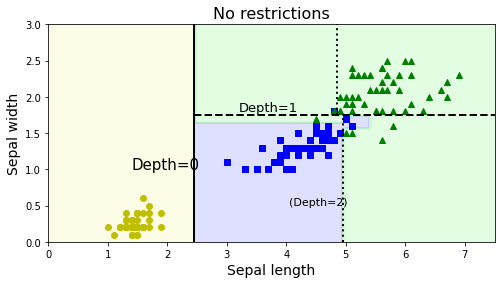

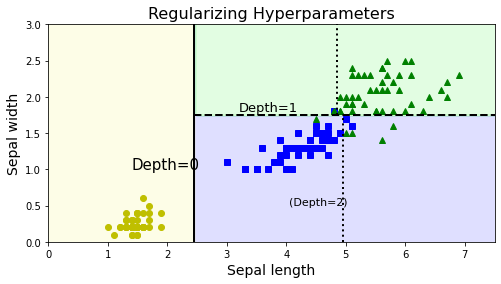

In [20]:
# Plot both the decision tree
plt.figure(figsize=(8, 4))

# call the plot_decision_boundary function for tree_clf
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.title("No restrictions", fontsize=16)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.figure(figsize=(8, 4))

# call the plot_decision_boundary function for tree_clf2
plot_decision_boundary(tree_clf2, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.title("Regularizing Hyperparameters", fontsize=16)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

From the above figure, we can see that, when there is no restriction of hyperparameters in decision tree, it can adjust itself according to the training dataset (overfitting problem). While, on the other hand, where there is the regularization of hyperparameters, the model will probably generalize better.

### Ungraded Excercises

1. Compare the Naive Bayes and Decision Tree classifier, based on complexity and speed.
2. Use MNIST dataset to train both of the classifiers and compare it with other linear classifiers that you have learned.


### Graded Excercise


### Please answer the questions below to complete the experiment:




In [21]:
#@title Is Decision Tree a classification or regression model? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "classification model", "regression model", "Both"]

In [22]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [23]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [24]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]

In [25]:
 #@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [26]:
 #@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [27]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
